
#Using Deep AutoVIML for text 
References:

https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_NLP_Demo.ipynb

Dataset used:Twitter Sentiment dataset
 https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

In [1]:
!pip install deep_autoviml --upgrade


     |████████████████████████████████| 139 kB 5.2 MB/s 
     |████████████████████████████████| 23.2 MB 123 kB/s 
     |████████████████████████████████| 308 kB 36.5 MB/s 
     |████████████████████████████████| 14.5 MB 34 kB/s 
     |████████████████████████████████| 170 kB 56.1 MB/s 
     |████████████████████████████████| 4.3 MB 62.4 MB/s 
     |████████████████████████████████| 454.4 MB 9.4 kB/s 
     |████████████████████████████████| 4.0 MB 42.2 MB/s 
     |████████████████████████████████| 1.2 MB 53.4 MB/s 
     |████████████████████████████████| 462 kB 61.8 MB/s 
     |████████████████████████████████| 209 kB 49.1 MB/s 
     |████████████████████████████████| 80 kB 8.8 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 144 kB 56.9 MB/s 
     |████████████████████████████████| 112 kB 57.1 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sh

In [2]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Imported deep_auto_viml. version=0.0.69
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [ ]:
from google.colab import files
uploaded = files.upload()

In [7]:
df = pd.read_csv('/content/train.csv')
df.round()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [8]:
df.rename(columns={"label":"class"}, inplace=True)
target = 'class'

In [9]:

#Split dataset
x = df.loc[:, df.columns!=target]
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(train.shape, test.shape)

(25569, 3) (6393, 3)


In [10]:
keras_model_type =  "auto" 
keras_options = {"early_stopping": False, 'lr_scheduler': 'rlr'}  
model_options = {'tuner':"storm", "max_trials":15, 'embedding_size': 50, 'cat_feat_cross_flag':False }

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    lr_scheduler : rlr
    early_stopping : False
Using following model_options given as input:
    cat_feat_cross_flag : False
    max_trials : 15
    tuner : storm
    embedding_size : 50
Max Trials : 15. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 25569 rows, 2 cols
Data Set column

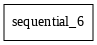


#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 7.56508875739645}
    original datasize = 25569, initial batchsize = 32
    Early stopping : False
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 40000
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 10, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = rlr

Splitting train into 80+20 percent: train and validation data
    Splitting validatio

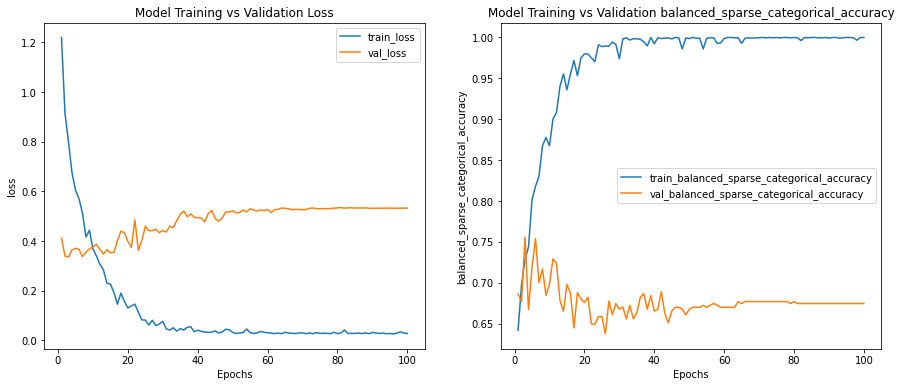

Time taken to train model (in mins) = 8
    Stopped epoch = 90
Held out data actuals shape: (256,)
    samples from label: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

Held out predictions shape:(256,)
    Sample predictions: [0 0 0 0 0 0 0 0 0 0]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: class
#################################################################


    Accuracy          = 92.2%
    Balanced Accuracy = 66.9%
    Precision         = 57.1%
    Average Precision = 75.7%
    Recall            = 36.4%
    F1 Score          = 44.4%
    ROC AUC           = 77.3%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 6.279406e-07
    set learning rate using best model: 6.279406e-07
    max epochs for training = 90

Model not being saved since save_model_flag set to False...
6165

Saving vocab dictionary using pickle in text/auto/model_2021_11_06-07_25_06/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in text/auto/model_2021_11_06-07_25_06/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in text/auto/model_2021_11_06-07_25_06/artifacts/var_df.pickle...will take time...
    Saved pickle file in text/auto/model_2021_11_06-07_25_06/artifacts/var_df.pickle

Deep_Auto_ViML completed. Total time taken 

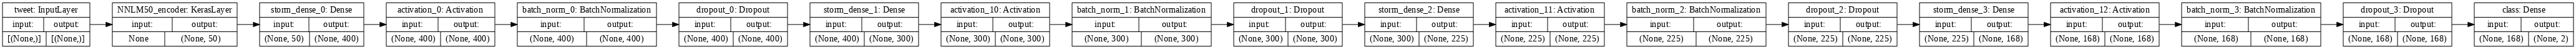

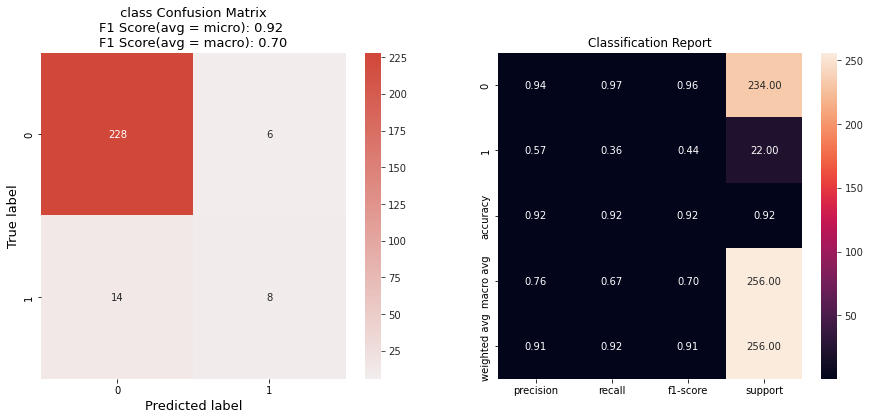

In [11]:
model, dicti = deepauto.fit(train, target, keras_model_type=keras_model_type, 
                            project_name='text',
                 save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

In [12]:
predictions = deepauto.predict(model, project_name='text', test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=dicti)


Loading deep_autoviml model from <tensorflow.python.keras.engine.functional.Functional object at 0x7f373ea28850> folder. This will take time...

Using <tensorflow.python.keras.engine.functional.Functional object at 0x7f373ea28850> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 6393
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    3 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        1 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 0, cats = 0, high cats = 0, very high cats = 1
Distribution of integer columns in dat

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
print(classification_report(test[target].values,predictions[1]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5937
           1       0.46      0.30      0.36       456

    accuracy                           0.93      6393
   macro avg       0.71      0.64      0.66      6393
weighted avg       0.91      0.93      0.92      6393

